# HW 05: Use Decision Tree to Solve a Mystery in History

##### Chaithra Kopparam Cheluvaiah
##### SUID 326926205
##### ckoppara@syr.edu

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import seaborn as sns

#### DATA LOADING

In [2]:
papers = pd.read_csv('data-fedPapers85.csv')
papers.shape

(85, 72)

In [3]:
papers.head() # viewing first 5 rows

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


#### 1. DATA  PREPARATION

Separating original dataset to training and testing data for classification.

In [4]:
# removing disputed essays from the training and testing data
temp_df = papers[papers['author']!='dispt']
temp_df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [5]:
# disputed essays
distputed_essays = papers[papers['author']=='dispt']
distputed_train = distputed_essays.iloc[:,2:]

In [6]:
temp_df.shape # 74 samples used for train and testing the model which does not contain any disputed essays

(74, 72)

In [7]:
distputed_essays.shape # 11 disupted essays that needs to be classified

(11, 72)

In [8]:
X = temp_df.iloc[:,2:] # independent variables
Y = temp_df['author'] # dependent variables

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.4) 
# default 40% is test and 60% is training data

In [10]:
X_train.shape

(44, 70)

In [11]:
X_test.shape

(30, 70)

In [12]:
Y_train.unique()

array(['Hamilton', 'Madison', 'HM', 'Jay'], dtype=object)

In [13]:
Y_test.unique()

array(['Hamilton', 'Jay', 'Madison', 'HM'], dtype=object)

#### 2: BUILDING & POST PRUNING DECISION TREE MODEL

In [14]:
# training the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy') # entropy to measure the purity of the split 
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.6, 0.875, 'upon <= 0.019\nentropy = 1.028\nsamples = 44\nvalue = [1, 33, 1, 9]\nclass = Madison'),
 Text(0.4, 0.625, 'and <= 0.513\nentropy = 0.866\nsamples = 11\nvalue = [1, 0, 1, 9]\nclass = Jay'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]\nclass = Jay'),
 Text(0.6, 0.375, 'would <= 0.037\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1, 0]\nclass = Hamilton'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Hamilton'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = HM'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0]\nclass = Madison')]

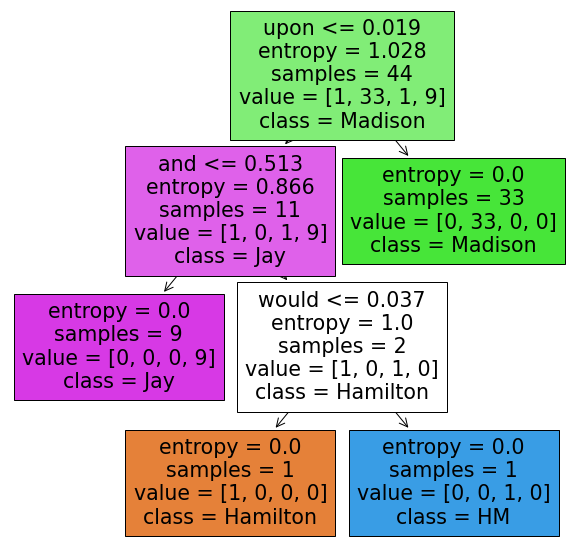

In [15]:
# visualizing the decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,feature_names=list(X_train.columns), class_names=list(Y_train.unique()))

In [16]:
print(tree.export_text(clf,feature_names=list(X_train.columns)))

|--- upon <= 0.02
|   |--- and <= 0.51
|   |   |--- class: Madison
|   |--- and >  0.51
|   |   |--- would <= 0.04
|   |   |   |--- class: HM
|   |   |--- would >  0.04
|   |   |   |--- class: Jay
|--- upon >  0.02
|   |--- class: Hamilton



In [17]:
# predicting on test data
test_pred=clf.predict(X_test)
test_pred

array(['Hamilton', 'Jay', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Madison', 'Jay', 'Hamilton', 'Hamilton', 'Hamilton', 'Jay',
       'Hamilton', 'HM', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Jay', 'Madison', 'Hamilton', 'Hamilton', 'Madison', 'Hamilton',
       'HM', 'HM', 'Hamilton', 'Madison', 'Hamilton', 'Madison'],
      dtype=object)

In [18]:
# predicting on training data
train_pred = clf.predict(X_train)
train_pred

array(['Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Madison', 'HM', 'Madison', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Madison', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Madison', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Jay', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Madison', 'Madison',
       'Hamilton', 'Hamilton'], dtype=object)

In [19]:
dispt_pred = clf.predict(distputed_train)
dispt_pred

array(['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison'],
      dtype=object)

#### VALIDATING THE MODEL  - CONFUSION MATRIX

In [20]:
# validating training data
tab = pd.crosstab(Y_train, train_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,HM,Hamilton,Jay,Madison
Actual,,,,
HM,1,0,0,0
Hamilton,0,33,0,0
Jay,0,0,1,0
Madison,0,0,0,9


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

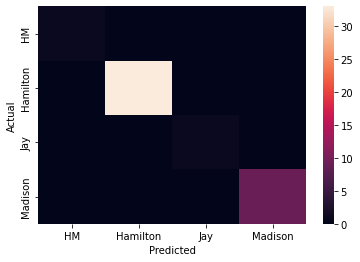

In [21]:
sns.heatmap(tab)

In [22]:
# validating testing data
tab = pd.crosstab(Y_test, test_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,HM,Hamilton,Jay,Madison
Actual,,,,
HM,0,0,1,1
Hamilton,0,17,0,1
Jay,1,0,3,0
Madison,2,0,0,4


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

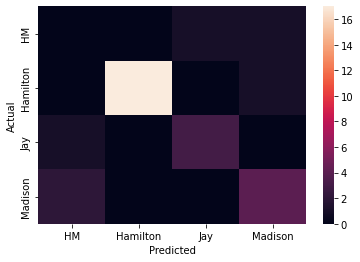

In [23]:
sns.heatmap(tab)

#### Clearly, Model is not performing well on the testing data. Essays authored by Jay and Madison are being classified as HM. It can happen that the model is overfitted which is common problem with decision trees.

##### Post pruning decision trees with cost complexity pruning


Pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. It is necessary to appropriate `ccp_alpha` and use it while training the model.

In [24]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.04545455, 0.17100961, 0.81127812])

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,criterion='entropy', ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.8112781244591327


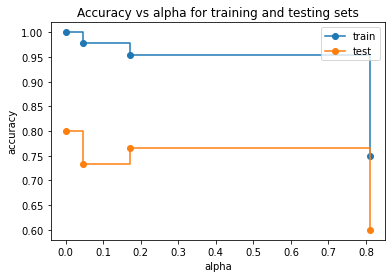

In [26]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### From the above plot, we can consider any value of ccp_alpha between 0.2 - 0.8. We can also choose alpha value above 0.0 but less than ~0.05 because the accuracy remained constant for training and testing data around that value.

In [27]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy', ccp_alpha=0.4)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.4, criterion='entropy', random_state=0)

[Text(0.5, 0.75, 'upon <= 0.019\nentropy = 1.028\nsamples = 44\nvalue = [1, 33, 1, 9]\nclass = Madison'),
 Text(0.25, 0.25, 'entropy = 0.866\nsamples = 11\nvalue = [1, 0, 1, 9]\nclass = Jay'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0]\nclass = Madison')]

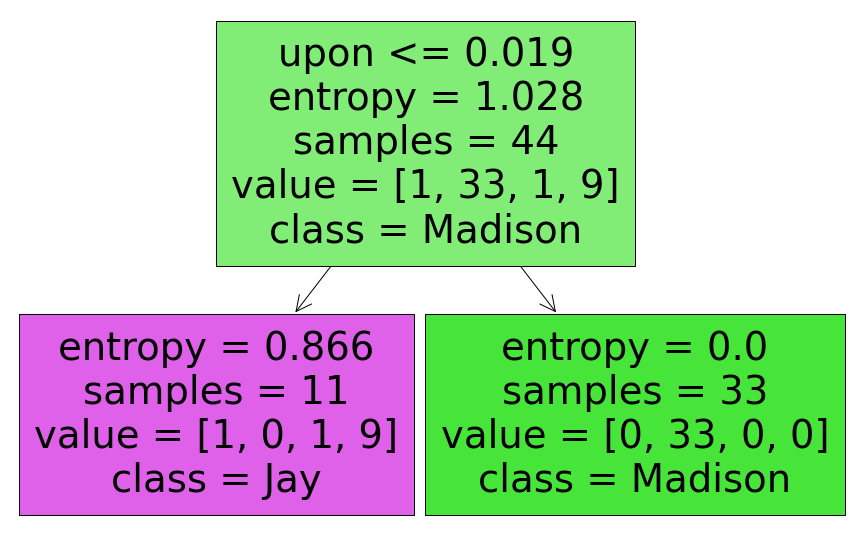

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True, feature_names=list(X_train.columns), class_names=list(Y_train.unique()))

In [29]:
print(tree.export_text(clf,feature_names=list(X_train.columns)))

|--- upon <= 0.02
|   |--- class: Madison
|--- upon >  0.02
|   |--- class: Hamilton



In [30]:
# predicting on test data
test_pred=clf.predict(X_test)
test_pred

array(['Hamilton', 'Madison', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Madison', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Madison', 'Hamilton', 'Madison', 'Hamilton',
       'Madison', 'Hamilton', 'Hamilton', 'Madison', 'Madison',
       'Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Madison',
       'Madison', 'Hamilton', 'Madison', 'Hamilton', 'Madison'],
      dtype=object)

In [31]:
# predicting on training data
train_pred = clf.predict(X_train)
train_pred

array(['Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Madison', 'Madison', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Madison', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Madison', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Madison',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Madison',
       'Madison', 'Madison', 'Hamilton', 'Hamilton'], dtype=object)

In [32]:
# validating training data
tab = pd.crosstab(Y_train, train_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,Hamilton,Madison
Actual,,
HM,0,1
Hamilton,33,0
Jay,0,1
Madison,0,9


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

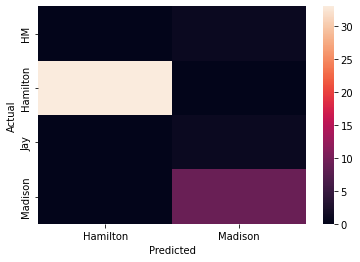

In [33]:
sns.heatmap(tab)

In [34]:
# validating testing data
tab = pd.crosstab(Y_test, test_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,Hamilton,Madison
Actual,,
HM,0,2
Hamilton,17,1
Jay,0,4
Madison,0,6


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

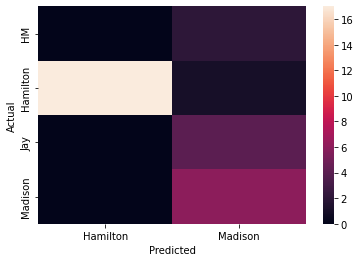

In [35]:
sns.heatmap(tab)

#### 3 PREDICTION

In [36]:
dispt_pred=clf.predict(distputed_train)
dispt_pred

array(['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison'],
      dtype=object)

#### Disputed essays are authored by Madison